In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['font.size'] = 15
import seaborn as sns

In [2]:
# !pip install plotnine # 시각화 라이브러리 => R에서 시각화하는 방법과 유사하게 시각화 한다.
from plotnine import *
import missingno as msno

In [3]:
# 현재 소스 프로그램의 위치(경로)를 보여준다.
%pwd

'/Users/mac/python/numpy/workspace'

In [4]:
# 현재 소스 프로그램이 위치한 경로의 파일 목록 보여준다.
%ls
# '%ls 폴더이름'으로 실행하면 현재 소스 프로그램이 위치한 경로 아래의 지정된 폴더의 파일 목록을 보여준다.

00_numpy_0_axis.ipynb
01_numpy_1.ipynb
02_numpy_2.ipynb
03_numpy_3.ipynb
04_pandas_1.ipynb
05_pandas_2.ipynb
06_pandas_3.ipynb
07_pandas_4.ipynb
08_pandas_5.ipynb
09_pandas_6.ipynb
10_pandas_7.ipynb
11_matplotlib_hangle.ipynb
12_anscombe.ipynb
13_Visualization_Matplotlib_Seaborn.ipynb
14_KoNLPy.ipynb
15_wordcloud.ipynb
16_Data_Analysis_1.ipynb
17_folium.ipynb
18_Data_Analysis_2.ipynb
19_Data_Analysis_3.ipynb
20_Data_Analysis_4.ipynb
21_Data_Analysis_5.ipynb
Musinsa.ipynb
data/
images/
output/
seoulBike.html
seoulBike.ipynb
text.txt
word.txt


2015년 10월부터 2021년 12월까지 주택분양보증을 받아 분양한 전체 민간 신규 아파트 분양가격 동향  
공공데이터포털(https://www.data.go.kr/)에서 전국 신규 민간 아파트 분양 가격 동향 검색  
<img src="./images/datagokr.png" width="800" align="left">

In [5]:
# read_csv() 함수로 csv 파일을 읽을때 csv 파일의 한글 인코딩 문제로 pd.read_csv('파일명')와 같이 읽을 때 아래와 같은 에러가
# 발생할 수 있다.
# UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc1 in position 0: invalid start byte
# UnicodeDecodeError가 발생하면 encoding='euc-kr' 옵션을 지정하면 csv 파일을 정상적으로 읽어올 수 있다.
# encoding='euc-kr', encoding='cp949', encoding='ms-949' 모두 같은 인코딩 방식을 의미한다.
# pre_sale = pd.read_csv('./data/전국_평균_분양가격_2021년_12월.csv', encoding='euc-kr', engine='python')
# pre_sale = pd.read_csv('./data/perSale_2021_12.csv', encoding='cp949')
pre_sale = pd.read_csv('./data/perSale_2021_12.csv', encoding='ms949')
pre_sale.shape

(6375, 5)

In [6]:
pre_sale.head()

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60제곱미터이하,2015,10,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721
4,서울,전용면적 102제곱미터초과,2015,10,5879


encoding 옵션을 지정하지 않고 사용하려면 csv 파일을 메모장으로 열고 파일 메뉴의 다른 이름으로 저장을 선택하고 인코딩 방식을 ANSI에서 UTF-8로 변경한 후 덮어쓰기로 저장하면 된다.  
<img src="./images/datagokr_encoding.png" width="800" align="left">

In [7]:
pre_sale = pd.read_csv('./data/perSale_2021_12_1.csv')
pre_sale.shape

(6375, 5)

In [8]:
pre_sale.tail()

,지역명,규모구분,연도,월,분양가격(제곱미터)
6370,제주,모든면적,2021,12,6574
6371,제주,전용면적 60제곱미터이하,2021,12,2862
6372,제주,전용면적 60제곱미터초과 85제곱미터이하,2021,12,6516
6373,제주,전용면적 85제곱미터초과 102제곱미터이하,2021,12,5924
6374,제주,전용면적 102제곱미터초과,2021,12,6493


dtypes 속성이나 info() 함수를 이용해서 데이터프레임을 구성하는 데이터 타입을 확인하고 필요하면 변경한다.

In [9]:
pre_sale.dtypes

지역명           object
규모구분          object
연도             int64
월              int64
분양가격(제곱미터)    object
dtype: object

In [10]:
pre_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6375 entries, 0 to 6374
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   지역명         6375 non-null   object
 1   규모구분        6375 non-null   object
 2   연도          6375 non-null   int64 
 3   월           6375 non-null   int64 
 4   분양가격(제곱미터)  5891 non-null   object
dtypes: int64(2), object(3)
memory usage: 249.1+ KB


In [11]:
# 연도와 월은 연산에 사용되는 데이터가 아니라 구분에 사용되는 카테고리 형태의 데이터이므로 문자열로 변환한다.
pre_sale['연도'] = pre_sale['연도'].astype(str)
# 데이터프레임의 특정 열 1개를 얻어올 때 '데이터프레임[열]', '데이터프레임.get(열)', '데이터프레임.열' 모두 사용이 가능하지만
# 데이터프레임의 특정 열에 데이터를 넣어줄 때는 '데이터프레임.get(열)'을 사용하면 에러가 발생된다.
# pre_sale['월'] = pre_sale.get('월').astype(str)
pre_sale['월'] = pre_sale.월.astype(str)

In [12]:
pre_sale.dtypes

지역명           object
규모구분          object
연도            object
월             object
분양가격(제곱미터)    object
dtype: object

In [13]:
# 분양가격(제곱미터)는 연산에 사용되는 데이터이므로 숫자로 변경한다.
# pre_sale['분양가격(제곱미터)'] = pre_sale['분양가격(제곱미터)'].astype(float)
# astype() 함수로 문자열을 숫자로 변경하려는 경우 숫자가 아닌 문자열이 있으면 에러가 발생된다. 이때 to_numeric() 함수를
# 사용하면 어느정도 오류를 제어할 수 있다.
# to_numeric() 함수의 errors 속성의 기본값은 raise로 숫자로 변경할 수 없는 값이 있으면 오류를 발생시킨다.
# ignore를 사용하면 숫자로 변경할 수 없는 값이 있으면 함수 실행을 무시하고 coerce를 사용하면 오류가 발생된 데이터를 누락값으로
# 변경한다.
pre_sale['분양가격(제곱미터)'] = pd.to_numeric(pre_sale['분양가격(제곱미터)'], errors='coerce')
# 2021년 9월 데이터부터 '분양가격(제곱미터)'열에 "6,493"형태로 입력되서 누락값으로 처리되는 문제가 발생되었다.
# csv 파일을 액셀로 열어서 데이터 서식을 변경한 후 다시 저장해서 사용한다. => 액셀 작업은 영상을 참조한다.

In [14]:
pre_sale.dtypes

지역명            object
규모구분           object
연도             object
월              object
분양가격(제곱미터)    float64
dtype: object

In [15]:
# 숫자로 변경된 '분양가격(제곱미터)'를 이용해서 평당 분양 가격을 계산한 열을 추가한다.
pre_sale['평당분양가격'] = pre_sale['분양가격(제곱미터)'] * 3.3
pre_sale.dtypes

지역명            object
규모구분           object
연도             object
월              object
분양가격(제곱미터)    float64
평당분양가격        float64
dtype: object

In [16]:
pre_sale.head()

,지역명,규모구분,연도,월,분양가격(제곱미터),평당분양가격
0,서울,모든면적,2015,10,5841.0,19275.3
1,서울,전용면적 60제곱미터이하,2015,10,5652.0,18651.6
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882.0,19410.6
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721.0,18879.3
4,서울,전용면적 102제곱미터초과,2015,10,5879.0,19400.7


In [17]:
# isnull() 함수와 sum() 함수를 사용해서 누락값이 존재하는가 확인하기
print(pre_sale.isnull().sum())

지역명             0
규모구분            0
연도              0
월               0
분양가격(제곱미터)    515
평당분양가격        515
dtype: int64


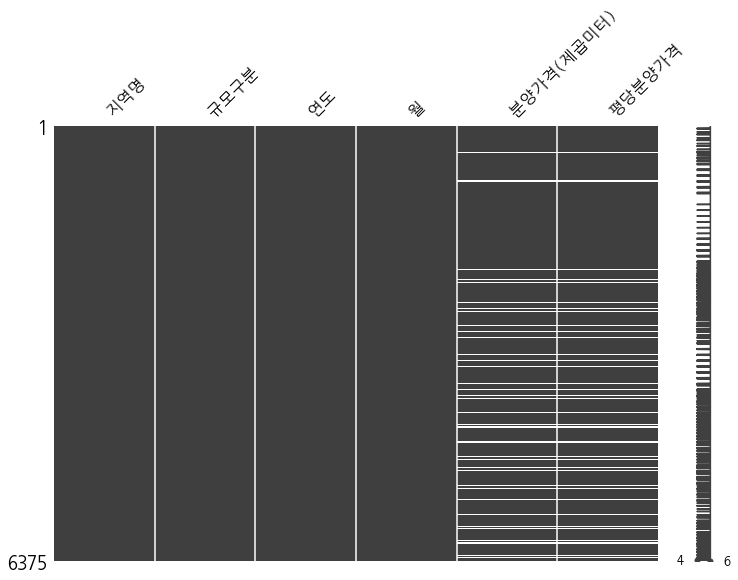

In [18]:
# missingno 라이브러리로 그래프를 그려서 누락값 확인하기 => 중간 중간에 흰색으로 보이는 부분이 누락값을 의미한다.
# missingno 라이브러리로 그래프 크기는 아래와 같이 figsize 옵션에 지정한다.
msno.matrix(pre_sale, figsize=(12, 8))
plt.show()

In [19]:
# 2017년 데이터만 추출한다.
pre_sale_2017 = pre_sale[pre_sale['연도'] == '2017']
# pre_sale_2017 = pre_sale.loc[pre_sale['연도'] == '2017']
pre_sale_2017

,지역명,규모구분,연도,월,분양가격(제곱미터),평당분양가격
1275,서울,모든면적,2017,1,6450.0,21285.0
1276,서울,전용면적 60제곱미터이하,2017,1,6662.0,21984.6
1277,서울,전용면적 60제곱미터초과 85제곱미터이하,2017,1,6500.0,21450.0
1278,서울,전용면적 85제곱미터초과 102제곱미터이하,2017,1,7030.0,23199.0
1279,서울,전용면적 102제곱미터초과,2017,1,6771.0,22344.3
...,...,...,...,...,...,...
2290,제주,모든면적,2017,12,3578.0,11807.4
2291,제주,전용면적 60제곱미터이하,2017,12,5380.0,17754.0
2292,제주,전용면적 60제곱미터초과 85제곱미터이하,2017,12,3467.0,11441.1
2293,제주,전용면적 85제곱미터초과 102제곱미터이하,2017,12,NaN,NaN


In [20]:
# 지역별 데이터가 동일하게 저장되어 있다.
pre_sale['지역명'].value_counts()

세종    375
인천    375
충남    375
충북    375
강원    375
제주    375
경기    375
경북    375
대구    375
서울    375
광주    375
부산    375
전북    375
울산    375
경남    375
대전    375
전남    375
Name: 지역명, dtype: int64

In [21]:
# 규모구분별 데이터가 동일하게 저장되어 있다.
pre_sale['규모구분'].value_counts()

전용면적 85제곱미터초과 102제곱미터이하    1275
모든면적                       1275
전용면적 60제곱미터이하              1275
전용면적 102제곱미터초과             1275
전용면적 60제곱미터초과 85제곱미터이하     1275
Name: 규모구분, dtype: int64

전국 연도별 평균 분양 가격

In [22]:
# pre_sale.groupby(pre_sale['연도'])['평당분양가격'].mean()
pre_sale.groupby(pre_sale['연도']).평당분양가격.mean()

연도
2015     9202.735802
2016     9683.025000
2017    10372.928923
2018    10978.938411
2019    12188.293092
2020    13039.422449
2021    13636.022540
Name: 평당분양가격, dtype: float64

In [23]:
# pd.options.display.float_format을 사용해서 데이터프레임에 저장된 실수 데이터의 출력 서식 지정할 수 있다.
# 출력 서식 '{:,.1f}'는 천 단위마다 ','를 출력하고 '.'뒤의 숫자만큼 소수점 아래 자리를 표시한다.
# 'f;를 붙이지 않으면 실수가 'e'를 사용하는 지수 형태로 표시된다.
pd.options.display.float_format = '{:,.1f}'.format

In [24]:
# describe() 함수로 데이터프레임의 숫자 데이터가 저장된 열의 요약 통계량을 확인할 수 있다.
pre_sale.groupby(pre_sale['연도']).describe()

분양가격(제곱미터)                                                           \
          count    mean     std     min     25%     50%     75%      max   
연도                                                                         
2015      243.0 2,788.7   976.9 1,868.0 2,225.0 2,516.0 3,025.5  7,092.0   
2016      984.0 2,934.2 1,071.4 1,900.0 2,282.0 2,672.0 3,148.5  8,096.0   
2017      975.0 3,143.3 1,110.5 1,976.0 2,373.0 2,838.0 3,466.0  7,887.0   
2018      919.0 3,327.0 1,186.1 2,076.0 2,525.0 2,952.0 3,698.0  8,098.0   
2019      912.0 3,693.4 1,563.2 2,124.0 2,635.5 3,395.0 4,066.2 12,728.0   
2020      882.0 3,951.3 1,632.7 2,297.0 2,780.5 3,734.5 4,441.0 13,835.0   
2021      945.0 4,132.1 1,567.7 2,409.0 3,057.0 3,858.0 4,539.0 10,746.0   

     평당분양가격                                                               
      count     mean     std     min      25%      50%      75%      max  
연도                                                                        
2015  243.0  9,202.7 3,223.6 6,164.4  7,342.5  8,302.8  9,984.1 23,403.6  
2016  984.0  9,683.0 3,535.8 6,270.0  7,530.6  8,817.6 10,390.0 26,716.8  
2017  975.0 10,372.9 3,664.7 6,520.8  7,830.9  9,365.4 11,437.8 26,027.1  
2018  919.0 10,978.9 3,914.1 6,850.8  8,332.5  9,741.6 12,203.4 26,723.4  
2019  912.0 12,188.3 5,158.6 7,009.2  8,697.1 11,203.5 13,418.6 42,002.4  
2020  882.0 13,039.4 5,388.1 7,580.1  9,175.6 12,323.8 14,655.3 45,655.5  
2021  945.0 13,636.0 5,173.4 7,949.7 10,088.1 12,731.4 14,978.7 35,461.8

In [25]:
# describe() 함수 실행 결과 'T' 속성을 지정해서 함수 실행 결과를 전치시켜서 요약 통계량이 수직 방향으로 출력할 수 있다.
pre_sale.groupby(pre_sale.연도).describe().T

연도                   2015     2016     2017     2018     2019     2020  \
분양가격(제곱미터) count    243.0    984.0    975.0    919.0    912.0    882.0   
           mean   2,788.7  2,934.2  3,143.3  3,327.0  3,693.4  3,951.3   
           std      976.9  1,071.4  1,110.5  1,186.1  1,563.2  1,632.7   
           min    1,868.0  1,900.0  1,976.0  2,076.0  2,124.0  2,297.0   
           25%    2,225.0  2,282.0  2,373.0  2,525.0  2,635.5  2,780.5   
           50%    2,516.0  2,672.0  2,838.0  2,952.0  3,395.0  3,734.5   
           75%    3,025.5  3,148.5  3,466.0  3,698.0  4,066.2  4,441.0   
           max    7,092.0  8,096.0  7,887.0  8,098.0 12,728.0 13,835.0   
평당분양가격     count    243.0    984.0    975.0    919.0    912.0    882.0   
           mean   9,202.7  9,683.0 10,372.9 10,978.9 12,188.3 13,039.4   
           std    3,223.6  3,535.8  3,664.7  3,914.1  5,158.6  5,388.1   
           min    6,164.4  6,270.0  6,520.8  6,850.8  7,009.2  7,580.1   
           25%    7,342.5  7,530.6  7,830.9  8,332.5  8,697.1  9,175.6   
           50%    8,302.8  8,817.6  9,365.4  9,741.6 11,203.5 12,323.8   
           75%    9,984.1 10,390.0 11,437.8 12,203.4 13,418.6 14,655.3   
           max   23,403.6 26,716.8 26,027.1 26,723.4 42,002.4 45,655.5   

연도                   2021  
분양가격(제곱미터) count    945.0  
           mean   4,132.1  
           std    1,567.7  
           min    2,409.0  
           25%    3,057.0  
           50%    3,858.0  
           75%    4,539.0  
           max   10,746.0  
평당분양가격     count    945.0  
           mean  13,636.0  
           std    5,173.4  
           min    7,949.7  
           25%   10,088.1  
           50%   12,731.4  
           75%   14,978.7  
           max   35,461.8

전국 규모별 연도별 평균 평당 분양 가격

In [26]:
# pivot_table() 함수는 액셀의 피벗 테이블과 유사한 형태로 데이터를 출력한다.
# pivot_table(values, index[, columns, aggfunc, fill_value])
# values: 피벗 테이블을 작성할 데이터프레임의 열을 지정한다.
# index: 그룹화의 첫 번째 기준으로 사용할 데이터프레임의 열을 지정한다. => 행 단위 그룹화
# columns: 그룹화의 두 번째 기준으로 사용할 데이터프레임의 열을 지정한다. => 열 단위 그룹화
# aggfunc: mean이 기본값이고 그룹화된 결과에 적용할 함수를 지정한다. count, sum, mean, max, min, std, median 등 사용가능
# fill_value: 피벗 테이블에 표시되는 NaN을 대체할 데이터를 지정한다. => 주로 0을 사용한다.
pre_sale.pivot_table('평당분양가격', '규모구분', '연도', aggfunc='mean')

연도,2015,2016,2017,2018,2019,2020,2021
규모구분,,,,,,,
모든면적,"8,893.0","9,293.0","9,927.3","10,675.8","11,602.7","12,317.7","13,706.9"
전용면적 102제곱미터초과,"9,837.2","10,388.7","11,311.2","11,445.6","13,331.5","14,068.4","14,380.8"
전용면적 60제곱미터이하,"8,951.5","9,398.9","10,271.4","10,844.4","11,506.8","12,400.8","12,983.8"
전용면적 60제곱미터초과 85제곱미터이하,"8,891.8","9,296.0","9,840.4","10,650.6","11,677.2","12,327.5","13,644.4"
전용면적 85제곱미터초과 102제곱미터이하,"9,518.5","10,122.4","10,573.4","11,441.7","12,980.7","14,759.6","13,532.1"


전국 지역별 평균 평당 분양 가격

In [27]:
# 규모구분이 모든면적으로 되어있는 평당 평균 분양 가격으로 연도별 변동 금액을 살펴보자
region_year_all = pre_sale[pre_sale['규모구분'] == '모든면적']
print(type(region_year_all))

<class 'pandas.core.frame.DataFrame'>


In [28]:
# pivot_table() 함수의 실행 결과는 2번째 인수(index)가 피벗 테이블의 index로 사용되므로 기존 index를 데이터로 사용하고 index를
# 다시 지정하려면 pivot_table() 함수의 실행 결과에 reset_index() 함수를 실행하면 된다.
region_year = region_year_all.pivot_table('평당분양가격', '지역명', '연도')
region_year.head()

연도,2015,2016,2017,2018,2019,2020,2021
지역명,,,,,,,
강원,"7,159.9","7,011.1","7,170.6","7,680.8","8,141.6","9,331.3","9,716.9"
경기,"10,377.4","11,220.0","11,840.7","13,186.0","14,468.8","14,383.3","14,183.1"
경남,"7,585.6","7,847.9","8,163.9","9,019.5","9,870.9","10,160.7","10,505.0"
경북,"7,170.9","7,360.7","7,802.6","8,505.2","8,856.6","9,545.0","10,333.4"
광주,"8,052.0","8,898.7","9,471.0","9,855.7","11,822.8","12,500.1","14,020.9"


In [29]:
region_year = region_year_all.pivot_table('평당분양가격', '지역명', '연도').reset_index()
region_year.head()

연도,지역명,2015,2016,2017,2018,2019,2020,2021
0,강원,"7,159.9","7,011.1","7,170.6","7,680.8","8,141.6","9,331.3","9,716.9"
1,경기,"10,377.4","11,220.0","11,840.7","13,186.0","14,468.8","14,383.3","14,183.1"
2,경남,"7,585.6","7,847.9","8,163.9","9,019.5","9,870.9","10,160.7","10,505.0"
3,경북,"7,170.9","7,360.7","7,802.6","8,505.2","8,856.6","9,545.0","10,333.4"
4,광주,"8,052.0","8,898.7","9,471.0","9,855.7","11,822.8","12,500.1","14,020.9"


데이터프레임 컬럼 이름과 인덱스 이름 변경하기

In [30]:
print(region_year.columns)
print(region_year.columns.name) # 인덱스의 열 이름을 확인할 수 있다.
# 데이터프레임의 columns 속성에 리스트 형태로 컬럼 이름을 넘겨서 전체 컬럼 이름을 일괄적으로 변경할 수 있다.
region_year.columns = ['지역', '2015년', '2016년', '2017년', '2018년', '2019년', '2020년', '2021년']
print(region_year.columns)
region_year.columns.name = '일련번호' # 인덱스의 열 이름을 변경한다.
region_year.head()

Index(['지역명', '2015', '2016', '2017', '2018', '2019', '2020', '2021'], dtype='object', name='연도')
연도
Index(['지역', '2015년', '2016년', '2017년', '2018년', '2019년', '2020년', '2021년'], dtype='object')


일련번호,지역,2015년,2016년,2017년,2018년,2019년,2020년,2021년
0,강원,"7,159.9","7,011.1","7,170.6","7,680.8","8,141.6","9,331.3","9,716.9"
1,경기,"10,377.4","11,220.0","11,840.7","13,186.0","14,468.8","14,383.3","14,183.1"
2,경남,"7,585.6","7,847.9","8,163.9","9,019.5","9,870.9","10,160.7","10,505.0"
3,경북,"7,170.9","7,360.7","7,802.6","8,505.2","8,856.6","9,545.0","10,333.4"
4,광주,"8,052.0","8,898.7","9,471.0","9,855.7","11,822.8","12,500.1","14,020.9"


In [31]:
# rename() 함수로 특정 컬럼 이름을 선택해서 변경할 수 있다. 열이름이 변경된 데이터프레임을 반드시 저장해야 적용된다.
region_year = region_year.rename(columns={'지역': '지역이름'})
region_year.head()

일련번호,지역이름,2015년,2016년,2017년,2018년,2019년,2020년,2021년
0,강원,"7,159.9","7,011.1","7,170.6","7,680.8","8,141.6","9,331.3","9,716.9"
1,경기,"10,377.4","11,220.0","11,840.7","13,186.0","14,468.8","14,383.3","14,183.1"
2,경남,"7,585.6","7,847.9","8,163.9","9,019.5","9,870.9","10,160.7","10,505.0"
3,경북,"7,170.9","7,360.7","7,802.6","8,505.2","8,856.6","9,545.0","10,333.4"
4,광주,"8,052.0","8,898.7","9,471.0","9,855.7","11,822.8","12,500.1","14,020.9"


In [32]:
# inplace=True 옵션을 지정하면 함수가 실행된 결과를 다시 저장하지 않아도 데이터프레임에 반영한다.
region_year.rename(columns={'지역이름': '지역명'}, inplace=True)
region_year.head()

일련번호,지역명,2015년,2016년,2017년,2018년,2019년,2020년,2021년
0,강원,"7,159.9","7,011.1","7,170.6","7,680.8","8,141.6","9,331.3","9,716.9"
1,경기,"10,377.4","11,220.0","11,840.7","13,186.0","14,468.8","14,383.3","14,183.1"
2,경남,"7,585.6","7,847.9","8,163.9","9,019.5","9,870.9","10,160.7","10,505.0"
3,경북,"7,170.9","7,360.7","7,802.6","8,505.2","8,856.6","9,545.0","10,333.4"
4,광주,"8,052.0","8,898.7","9,471.0","9,855.7","11,822.8","12,500.1","14,020.9"


In [33]:
# 특정 컬럼 이름에 접근할 때 인덱싱을 사용할 수 있다.
print(region_year.columns[0])
for i in range(1, 8):
    region_year.rename(columns={region_year.columns[i]: str(i + 2014)}, inplace=True)
region_year.head()

지역명


일련번호,지역명,2015,2016,2017,2018,2019,2020,2021
0,강원,"7,159.9","7,011.1","7,170.6","7,680.8","8,141.6","9,331.3","9,716.9"
1,경기,"10,377.4","11,220.0","11,840.7","13,186.0","14,468.8","14,383.3","14,183.1"
2,경남,"7,585.6","7,847.9","8,163.9","9,019.5","9,870.9","10,160.7","10,505.0"
3,경북,"7,170.9","7,360.7","7,802.6","8,505.2","8,856.6","9,545.0","10,333.4"
4,광주,"8,052.0","8,898.7","9,471.0","9,855.7","11,822.8","12,500.1","14,020.9"


In [34]:
print(list(region_year.index))
# 데이터프레임의 index 속성에 리스트 형태로 인덱스 이름을 넘겨서 전체 인덱스 이름을 일괄적으로 변경할 수 있다.
region_year.index = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16']
print(list(region_year.index))
region_year.head()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16']


일련번호,지역명,2015,2016,2017,2018,2019,2020,2021
00,강원,"7,159.9","7,011.1","7,170.6","7,680.8","8,141.6","9,331.3","9,716.9"
01,경기,"10,377.4","11,220.0","11,840.7","13,186.0","14,468.8","14,383.3","14,183.1"
02,경남,"7,585.6","7,847.9","8,163.9","9,019.5","9,870.9","10,160.7","10,505.0"
03,경북,"7,170.9","7,360.7","7,802.6","8,505.2","8,856.6","9,545.0","10,333.4"
04,광주,"8,052.0","8,898.7","9,471.0","9,855.7","11,822.8","12,500.1","14,020.9"


In [35]:
# rename() 함수로 특정 인덱스 이름을 선택해서 변경할 수 있다.
region_year.rename(index={'00': '영번째', '01': '첫번째'}, inplace=True)
region_year.head()

일련번호,지역명,2015,2016,2017,2018,2019,2020,2021
영번째,강원,"7,159.9","7,011.1","7,170.6","7,680.8","8,141.6","9,331.3","9,716.9"
첫번째,경기,"10,377.4","11,220.0","11,840.7","13,186.0","14,468.8","14,383.3","14,183.1"
02,경남,"7,585.6","7,847.9","8,163.9","9,019.5","9,870.9","10,160.7","10,505.0"
03,경북,"7,170.9","7,360.7","7,802.6","8,505.2","8,856.6","9,545.0","10,333.4"
04,광주,"8,052.0","8,898.7","9,471.0","9,855.7","11,822.8","12,500.1","14,020.9"


In [36]:
# 특정 인덱스 이름에 접근할 때 인덱싱을 사용할 수 있다.
print(region_year.index[0])
for i in range(17):
    region_year.rename(index={region_year.index[i]: i}, inplace=True)
region_year.head()

영번째


일련번호,지역명,2015,2016,2017,2018,2019,2020,2021
0,강원,"7,159.9","7,011.1","7,170.6","7,680.8","8,141.6","9,331.3","9,716.9"
1,경기,"10,377.4","11,220.0","11,840.7","13,186.0","14,468.8","14,383.3","14,183.1"
2,경남,"7,585.6","7,847.9","8,163.9","9,019.5","9,870.9","10,160.7","10,505.0"
3,경북,"7,170.9","7,360.7","7,802.6","8,505.2","8,856.6","9,545.0","10,333.4"
4,광주,"8,052.0","8,898.7","9,471.0","9,855.7","11,822.8","12,500.1","14,020.9"


전국 지역별 평균 분양 가격 변동 금액

In [37]:
region_year['변동액'] = region_year['2021'] - region_year['2015']
region_year

일련번호,지역명,2015,2016,2017,2018,2019,2020,2021,변동액
0,강원,"7,159.9","7,011.1","7,170.6","7,680.8","8,141.6","9,331.3","9,716.9","2,557.0"
1,경기,"10,377.4","11,220.0","11,840.7","13,186.0","14,468.8","14,383.3","14,183.1","3,805.7"
2,경남,"7,585.6","7,847.9","8,163.9","9,019.5","9,870.9","10,160.7","10,505.0","2,919.4"
3,경북,"7,170.9","7,360.7","7,802.6","8,505.2","8,856.6","9,545.0","10,333.4","3,162.5"
4,광주,"8,052.0","8,898.7","9,471.0","9,855.7","11,822.8","12,500.1","14,020.9","5,968.9"
5,대구,"9,232.3","10,310.0","11,507.1","12,075.8","13,852.0","15,145.1","15,558.1","6,325.8"
6,대전,"8,098.2","8,501.6","9,056.0","10,180.2","11,777.7","11,094.0","11,914.1","3,815.9"
7,부산,"10,307.0","10,429.9","11,663.6","12,997.9","13,116.4","13,247.6","14,645.7","4,338.7"
8,서울,"19,725.2","20,663.5","21,425.2","22,889.4","26,131.0","26,910.1","30,115.2","10,390.0"
9,세종,"8,750.5","8,860.5","9,133.0","10,354.8","11,078.9","11,355.3","12,561.2","3,810.7"


In [38]:
max_delta_price = np.max(region_year['변동액']) * 1000
max_delta_price
# sido = region_year[region_year['변동액'] == np.max(region_year['변동액'])].values[0][0]
sido = region_year[region_year['변동액'] == np.max(region_year['변동액'])].지역명.values[0]
print(sido)
print('2015년부터 2021년까지 분양가는 계속 상승했으며, 상승액이 가장 큰 지역 {}로 상승액은 평당 {:,.0f}원 이다.'.
      format(sido, max_delta_price))

제주
2015년부터 2021년까지 분양가는 계속 상승했으며, 상승액이 가장 큰 지역 제주로 상승액은 평당 16,018,750원 이다.


In [39]:
min_delta_price = np.min(region_year['변동액']) * 1000
min_delta_price
sido = region_year[region_year['변동액'] == np.min(region_year['변동액'])].지역명.values[0]
print(sido)
print('2015년부터 2021년까지 분양가는 계속 상승했으며, 상승액이 가장 작은 지역 {}로 상승액은 평당 {:,.0f}원 이다.'.
      format(sido, min_delta_price))

충북
2015년부터 2021년까지 분양가는 계속 상승했으며, 상승액이 가장 작은 지역 충북로 상승액은 평당 2,036,100원 이다.


In [40]:
mean_delta_price = np.mean(region_year['변동액']) * 1000
mean_delta_price

4813842.647058824

plotnine 라이브러리를 이용한 시각화

In [41]:
region_year_all

,지역명,규모구분,연도,월,분양가격(제곱미터),평당분양가격
0,서울,모든면적,2015,10,"5,841.0","19,275.3"
5,인천,모든면적,2015,10,"3,163.0","10,437.9"
10,경기,모든면적,2015,10,"3,138.0","10,355.4"
15,부산,모든면적,2015,10,"3,112.0","10,269.6"
20,대구,모든면적,2015,10,"2,682.0","8,850.6"
...,...,...,...,...,...,...
6350,전북,모든면적,2021,12,"2,777.0","9,164.1"
6355,전남,모든면적,2021,12,"2,892.0","9,543.6"
6360,경북,모든면적,2021,12,"3,297.0","10,880.1"
6365,경남,모든면적,2021,12,"3,309.0","10,919.7"


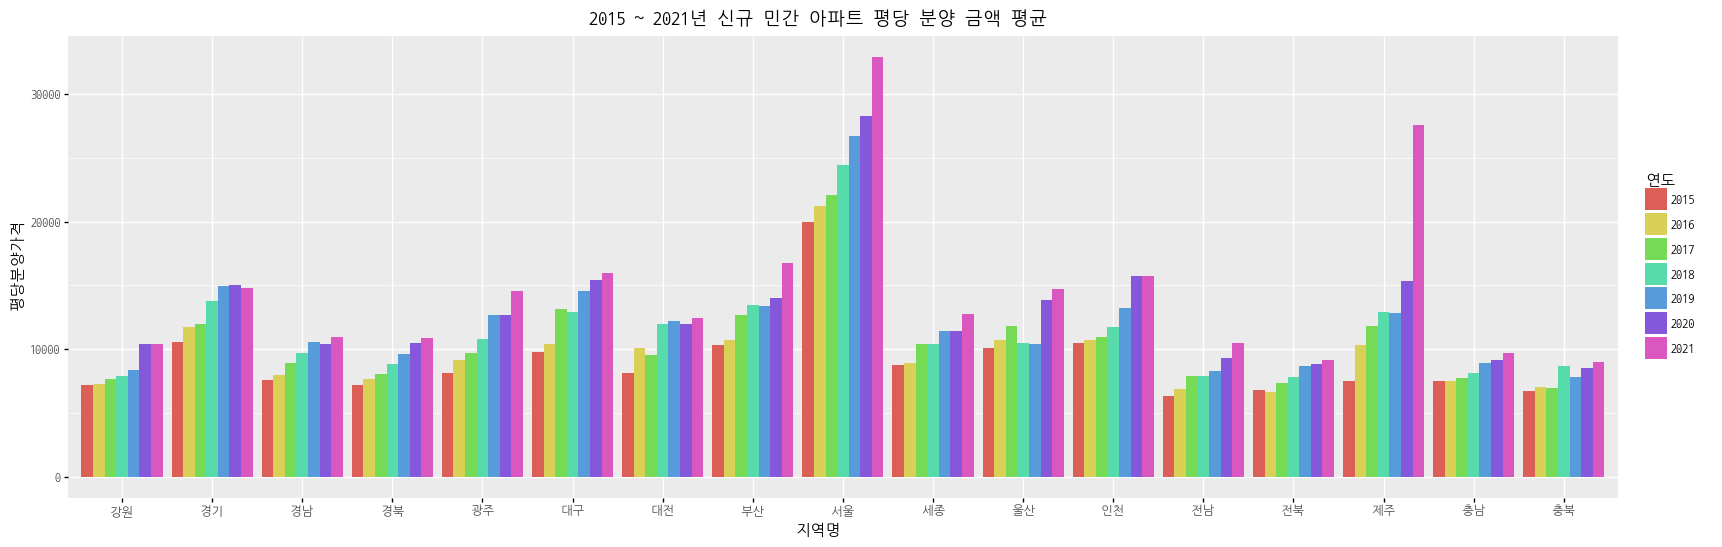

<ggplot: (-9223363262913720611)>

In [42]:
# 연도별 평당 분양 금액 평균 시각화
# ggplot(데이터프레임, aes(x=x축, y=y축, fill='범례')) # 차트 배경을 만든다.
#     + 차트함수() # 배경 위에 차트를 만든다.
#     + 차트속성함수() # 차트 위에 각종 필요한 정보를 표시한다.
'''
ggplot(region_year_all, aes(x='지역명', y='평당분양가격', fill='연도')) \
    + geom_bar(stat='identity', position='dodge') \
    + theme(text=element_text(family='NanumGothicCoding'), figure_size=(20, 6)) \
    + ggtitle('2015 ~ 2021년 신규 민간 아파트 평균 평당 분양 금액')
'''
(
ggplot(region_year_all, aes(x='지역명', y='평당분양가격', fill='연도')) 
    + geom_bar(stat='identity', position='dodge') 
    + theme(text=element_text(family='NanumGothicCoding'), figure_size=(20, 6)) 
    + ggtitle('2015 ~ 2021년 신규 민간 아파트 평당 분양 금액 평균')
)

In [43]:
# 규모별 지역별 평당 분양 금액 합계 피벗 테이블
pre_sale_sum = pre_sale.pivot_table('평당분양가격', '규모구분', '지역명', aggfunc='sum').reset_index()
pre_sale_sum

지역명,규모구분,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
0,모든면적,"610,107.3","982,515.6","689,571.3","650,354.1","822,987.0","969,074.7","774,579.3","944,133.3","1,836,789.9","718,245.0","759,069.3","929,728.8","595,316.7","577,757.4","1,006,575.9","616,638.0","567,494.4"
1,전용면적 102제곱미터초과,"730,237.2","1,143,073.8","710,744.1","711,532.8","779,773.5","1,059,481.5","446,252.4","1,008,889.2","1,737,400.5","728,583.9","437,860.5","1,083,960.9","687,875.1","640,635.6","775,120.5","609,985.2","636,629.4"
2,전용면적 60제곱미터이하,"626,538.0","1,014,324.3","662,630.1","643,318.5","725,201.4","970,262.7","689,502.0","910,199.4","1,887,382.2","513,140.1","610,170.0","924,861.3","564,131.7","592,620.6","790,396.2","613,941.9","561,231.0"
3,전용면적 60제곱미터초과 85제곱미터이하,"607,077.9","980,364.0","686,683.8","648,806.4","814,489.5","969,916.2","770,906.4","940,368.0","1,834,740.6","684,908.4","763,765.2","935,104.5","595,452.0","575,236.2","998,187.3","618,073.5","571,358.7"
4,전용면적 85제곱미터초과 102제곱미터이하,"569,101.5","1,060,332.9","852,663.9","551,796.3","359,181.9","832,702.2","245,094.3","940,849.8","2,088,223.5","686,574.9","222,591.6","963,065.4","557,142.3","606,757.8","422,756.4","614,202.6","622,845.3"


In [44]:
pre_sale_melt = pd.melt(pre_sale_sum, '규모구분')
pre_sale_melt.rename(columns={'value': '평당분양가격'}, inplace=True)
pre_sale_melt

,규모구분,지역명,평당분양가격
0,모든면적,강원,"610,107.3"
1,전용면적 102제곱미터초과,강원,"730,237.2"
2,전용면적 60제곱미터이하,강원,"626,538.0"
3,전용면적 60제곱미터초과 85제곱미터이하,강원,"607,077.9"
4,전용면적 85제곱미터초과 102제곱미터이하,강원,"569,101.5"
...,...,...,...
80,모든면적,충북,"567,494.4"
81,전용면적 102제곱미터초과,충북,"636,629.4"
82,전용면적 60제곱미터이하,충북,"561,231.0"
83,전용면적 60제곱미터초과 85제곱미터이하,충북,"571,358.7"


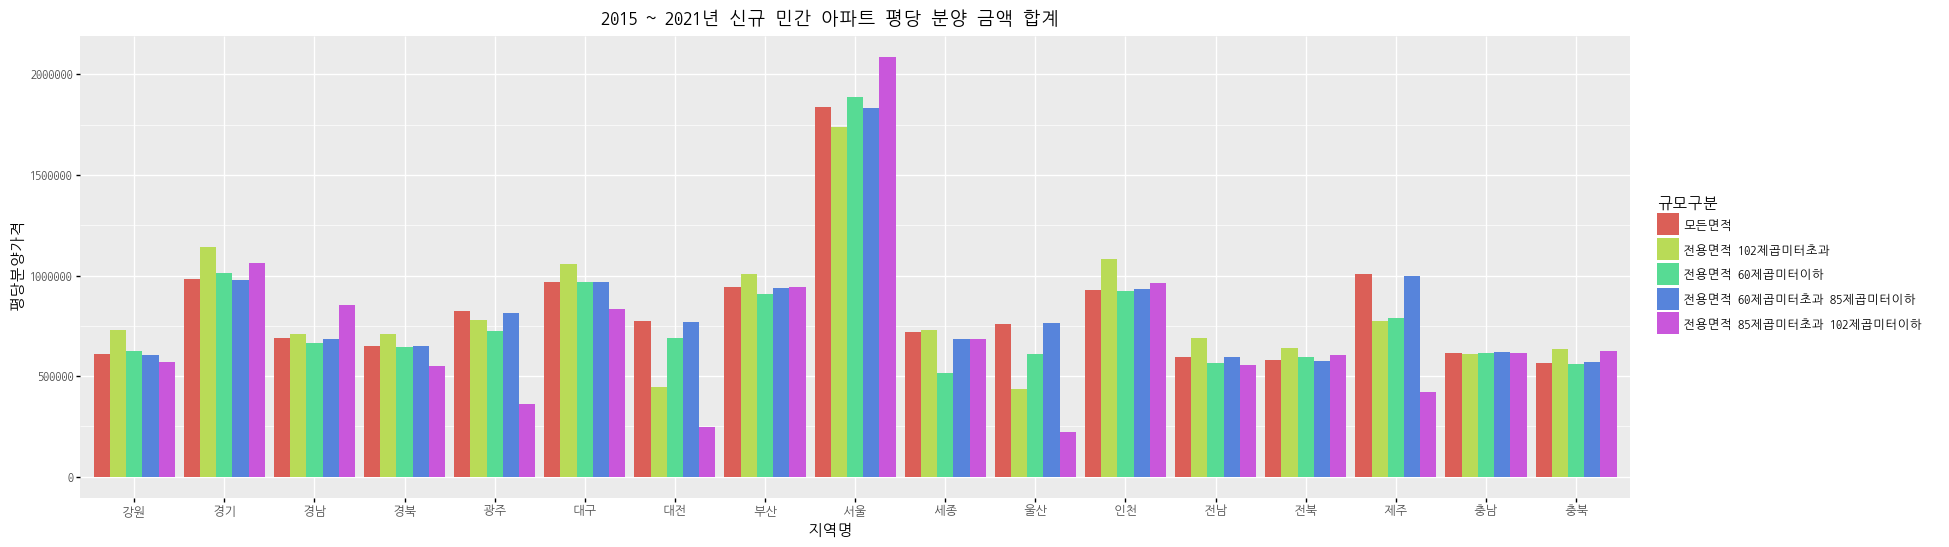

<ggplot: (8773949508861)>

In [45]:
# 규모별 지역별 평당 분양 금액 합계 시각화
(
ggplot(pre_sale_melt, aes(x='지역명', y='평당분양가격', fill='규모구분')) 
    + geom_bar(stat='identity', position='dodge') 
    + theme(text=element_text(family='NanumGothicCoding'), figure_size=(20, 6)) 
    + ggtitle('2015 ~ 2021년 신규 민간 아파트 평당 분양 금액 합계')
)

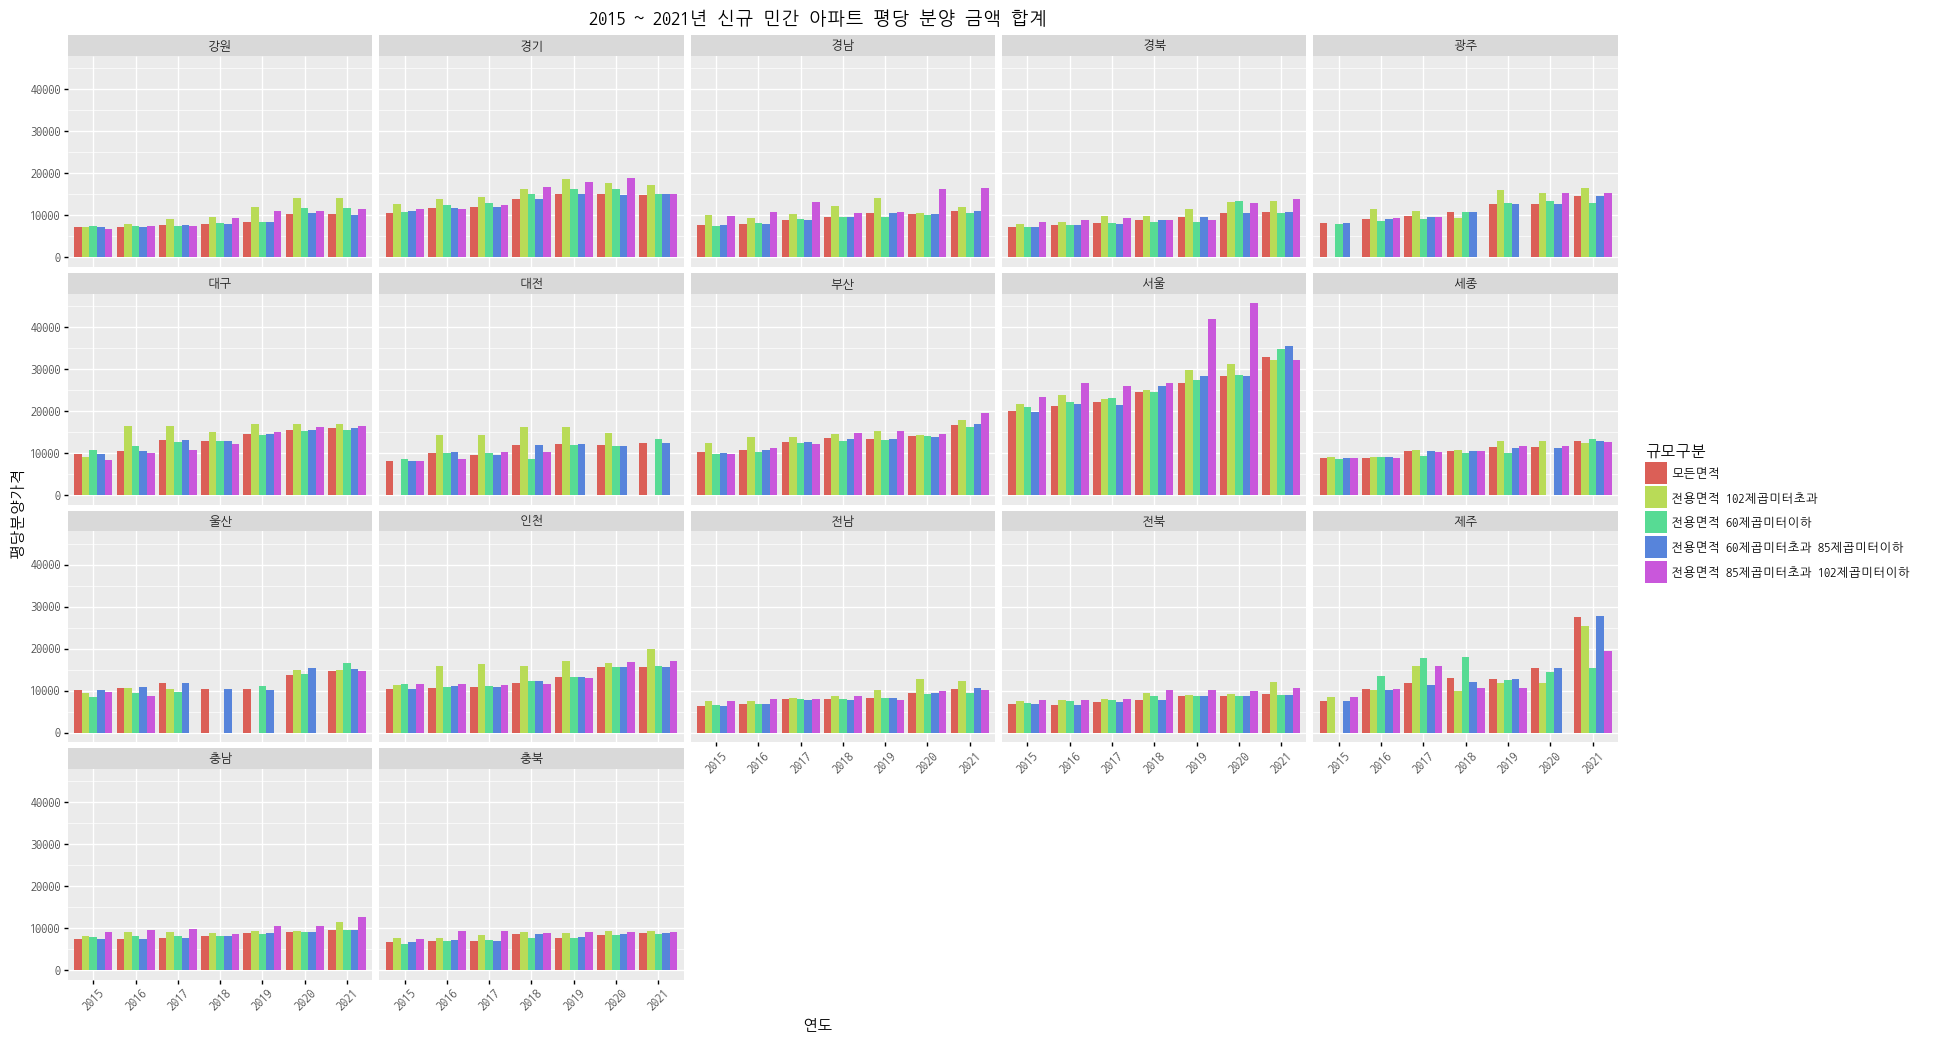

<ggplot: (8773949738395)>

In [46]:
(
ggplot(pre_sale, aes(x='연도', y='평당분양가격', fill='규모구분')) 
    + geom_bar(stat='identity', position='dodge') 
    + facet_wrap('지역명')
    + theme(text=element_text(family='NanumGothicCoding'), figure_size=(20, 12), axis_text_x=element_text(rotation=45)) 
    + ggtitle('2015 ~ 2021년 신규 민간 아파트 평당 분양 금액 합계')
)

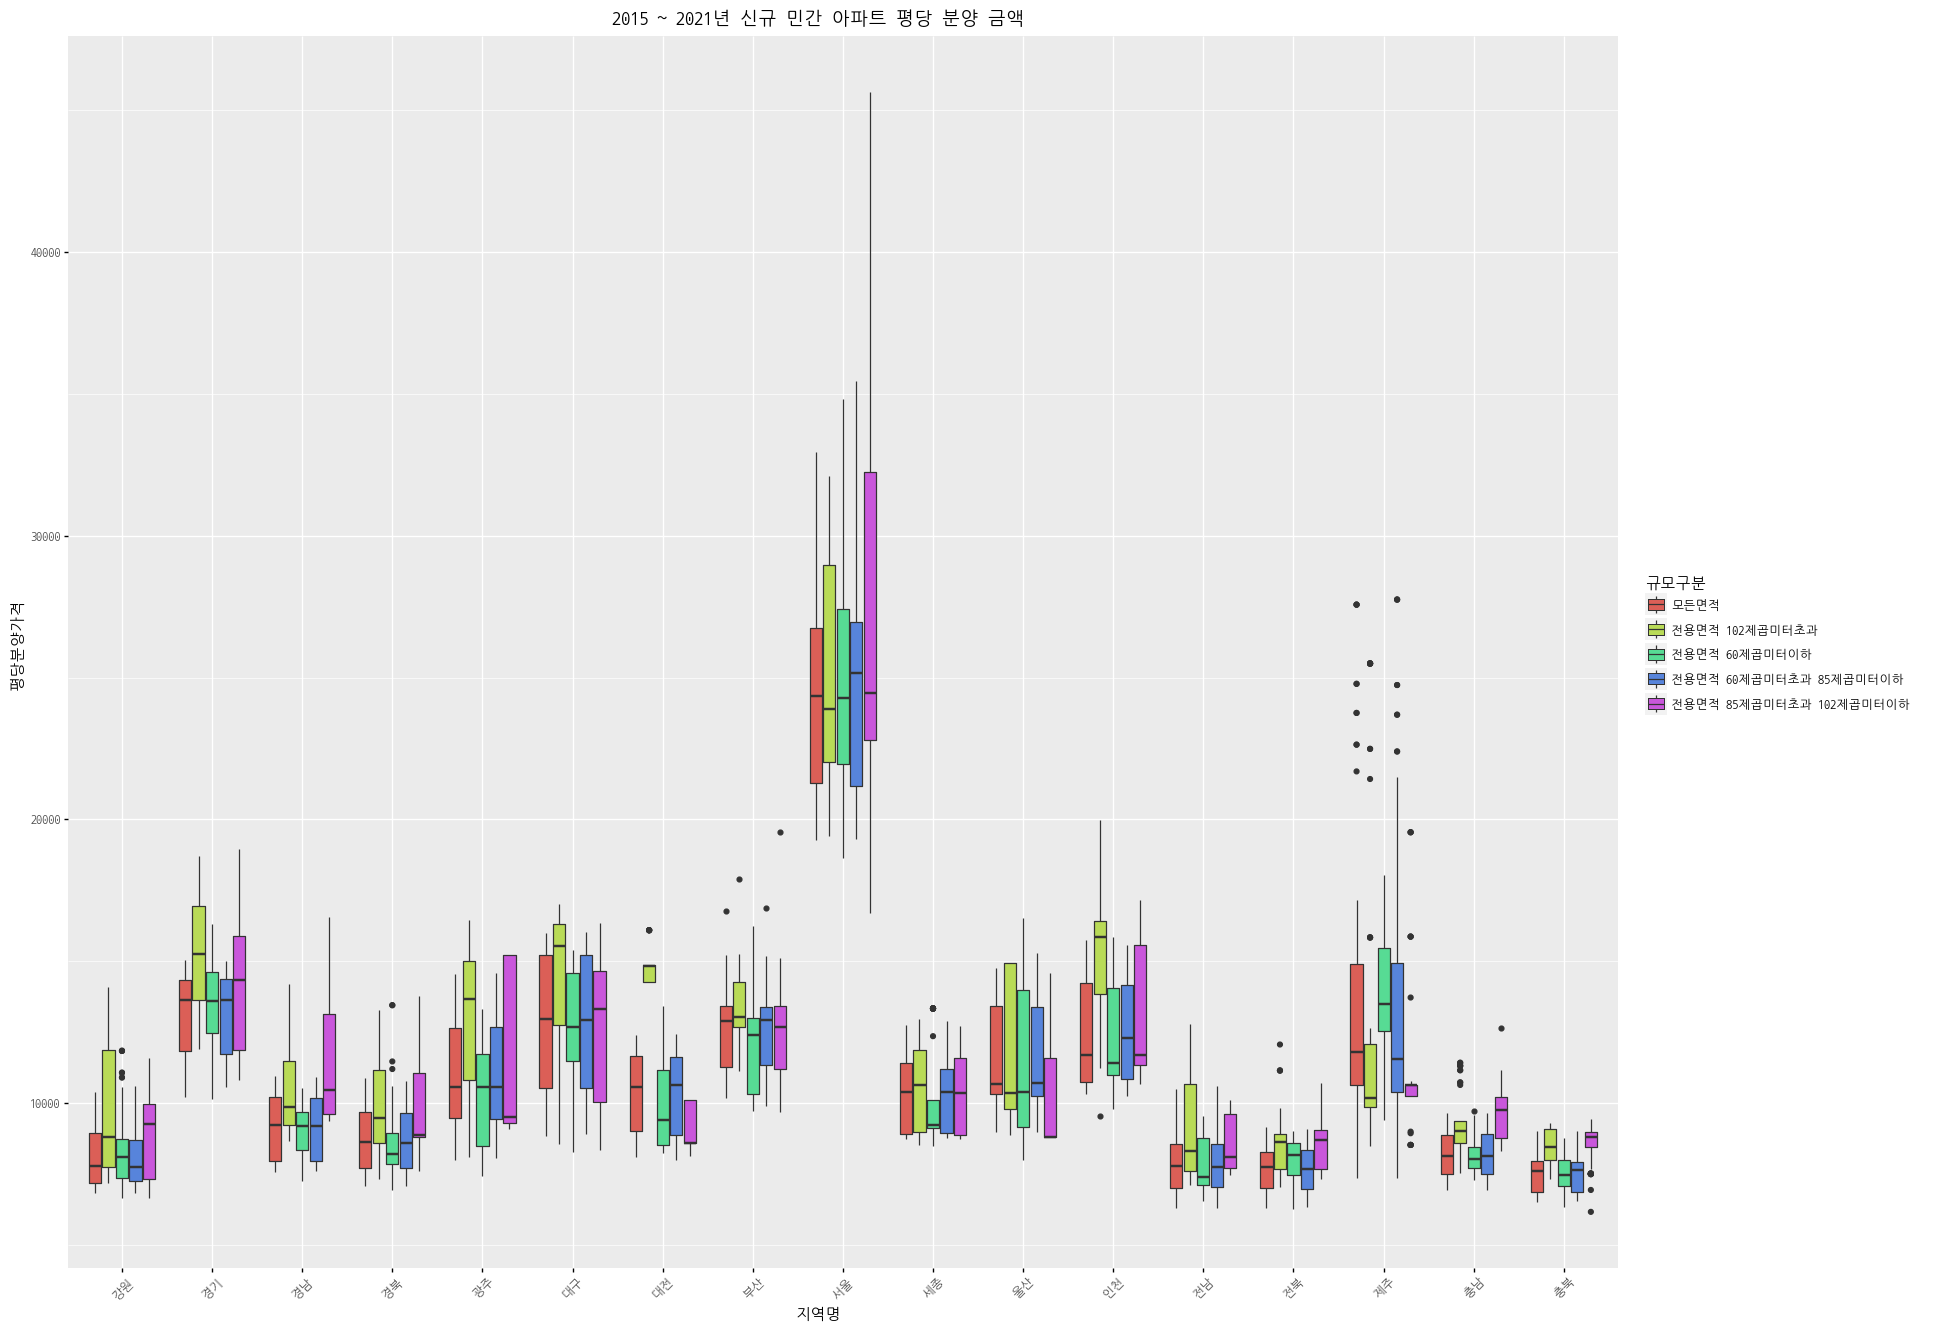

<ggplot: (-9223363262903848234)>

In [47]:
# boxplot을 그려보자.
(
ggplot(pre_sale, aes(x='지역명', y='평당분양가격', fill='규모구분')) 
    + geom_boxplot() 
    + theme(text=element_text(family='NanumGothicCoding'), figure_size=(20, 16), axis_text_x=element_text(rotation=45)) 
    + ggtitle('2015 ~ 2021년 신규 민간 아파트 평당 분양 금액')
)

In [48]:
# 사업 규모가 가장 컸던 서울
pre_sale_seoul = pre_sale[pre_sale['지역명'] == '서울']
pre_sale_seoul

,지역명,규모구분,연도,월,분양가격(제곱미터),평당분양가격
0,서울,모든면적,2015,10,"5,841.0","19,275.3"
1,서울,전용면적 60제곱미터이하,2015,10,"5,652.0","18,651.6"
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,"5,882.0","19,410.6"
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,"5,721.0","18,879.3"
4,서울,전용면적 102제곱미터초과,2015,10,"5,879.0","19,400.7"
...,...,...,...,...,...,...
6290,서울,모든면적,2021,12,"9,983.0","32,943.9"
6291,서울,전용면적 60제곱미터이하,2021,12,"10,553.0","34,824.9"
6292,서울,전용면적 60제곱미터초과 85제곱미터이하,2021,12,"10,746.0","35,461.8"
6293,서울,전용면적 85제곱미터초과 102제곱미터이하,2021,12,"7,274.0","24,004.2"


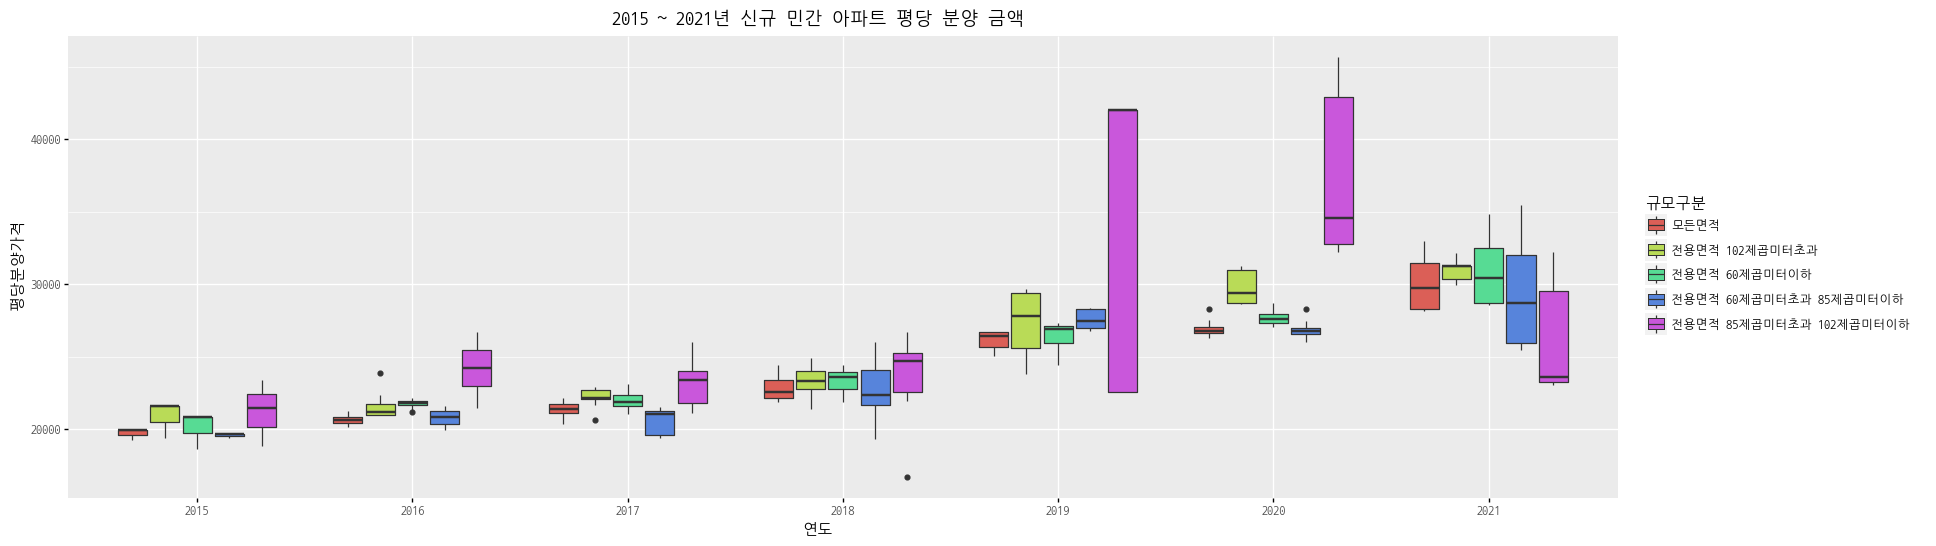

<ggplot: (8773949771738)>

In [49]:
(
ggplot(pre_sale_seoul, aes(x='연도', y='평당분양가격', fill='규모구분')) 
    + geom_boxplot() 
    + theme(text=element_text(family='NanumGothicCoding'), figure_size=(20, 6)) 
    + ggtitle('2015 ~ 2021년 신규 민간 아파트 평당 분양 금액')
)

In [50]:
# 상승액이 가장 큰 지역 제주
pre_sale_jeju = pre_sale[pre_sale['지역명'] == '제주']
pre_sale_jeju

,지역명,규모구분,연도,월,분양가격(제곱미터),평당분양가격
80,제주,모든면적,2015,10,"2,232.0","7,365.6"
81,제주,전용면적 60제곱미터이하,2015,10,nan,nan
82,제주,전용면적 60제곱미터초과 85제곱미터이하,2015,10,"2,225.0","7,342.5"
83,제주,전용면적 85제곱미터초과 102제곱미터이하,2015,10,"2,583.0","8,523.9"
84,제주,전용면적 102제곱미터초과,2015,10,"2,574.0","8,494.2"
...,...,...,...,...,...,...
6370,제주,모든면적,2021,12,"6,574.0","21,694.2"
6371,제주,전용면적 60제곱미터이하,2021,12,"2,862.0","9,444.6"
6372,제주,전용면적 60제곱미터초과 85제곱미터이하,2021,12,"6,516.0","21,502.8"
6373,제주,전용면적 85제곱미터초과 102제곱미터이하,2021,12,"5,924.0","19,549.2"


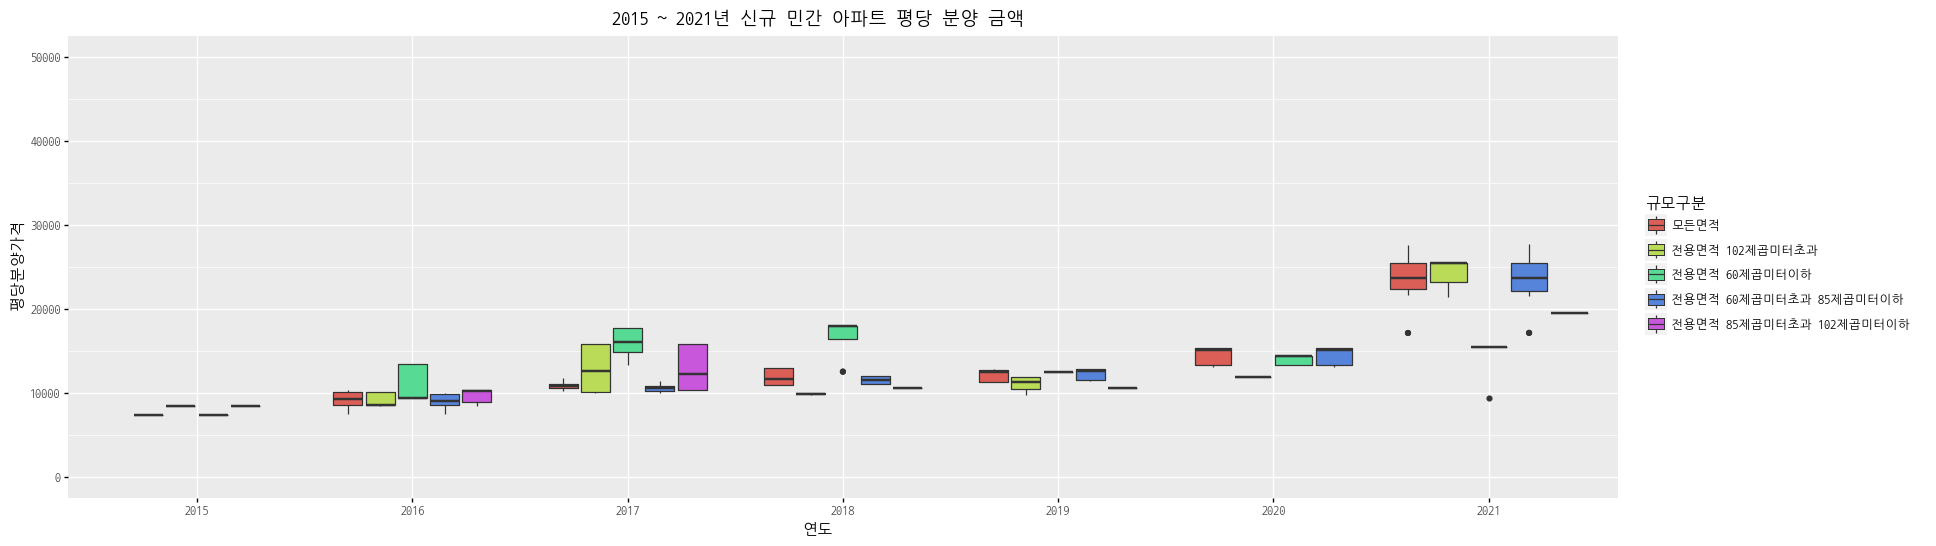

<ggplot: (8773949453660)>

In [51]:
(
ggplot(pre_sale_jeju, aes(x='연도', y='평당분양가격', fill='규모구분')) 
    + geom_boxplot() 
    + theme(text=element_text(family='NanumGothicCoding'), figure_size=(20, 6)) 
    + ggtitle('2015 ~ 2021년 신규 민간 아파트 평당 분양 금액')
    + scale_y_continuous(limits=(0, 50000))
)

In [52]:
# 상승액이 가장 큰 지역 충북
pre_sale_chungbuk = pre_sale[pre_sale['지역명'] == '충북']
pre_sale_chungbuk

,지역명,규모구분,연도,월,분양가격(제곱미터),평당분양가격
50,충북,모든면적,2015,10,"2,032.0","6,705.6"
51,충북,전용면적 60제곱미터이하,2015,10,"1,919.0","6,332.7"
52,충북,전용면적 60제곱미터초과 85제곱미터이하,2015,10,"2,033.0","6,708.9"
53,충북,전용면적 85제곱미터초과 102제곱미터이하,2015,10,"2,102.0","6,936.6"
54,충북,전용면적 102제곱미터초과,2015,10,"2,369.0","7,817.7"
...,...,...,...,...,...,...
6340,충북,모든면적,2021,12,"2,729.0","9,005.7"
6341,충북,전용면적 60제곱미터이하,2021,12,"2,657.0","8,768.1"
6342,충북,전용면적 60제곱미터초과 85제곱미터이하,2021,12,"2,735.0","9,025.5"
6343,충북,전용면적 85제곱미터초과 102제곱미터이하,2021,12,"2,752.0","9,081.6"


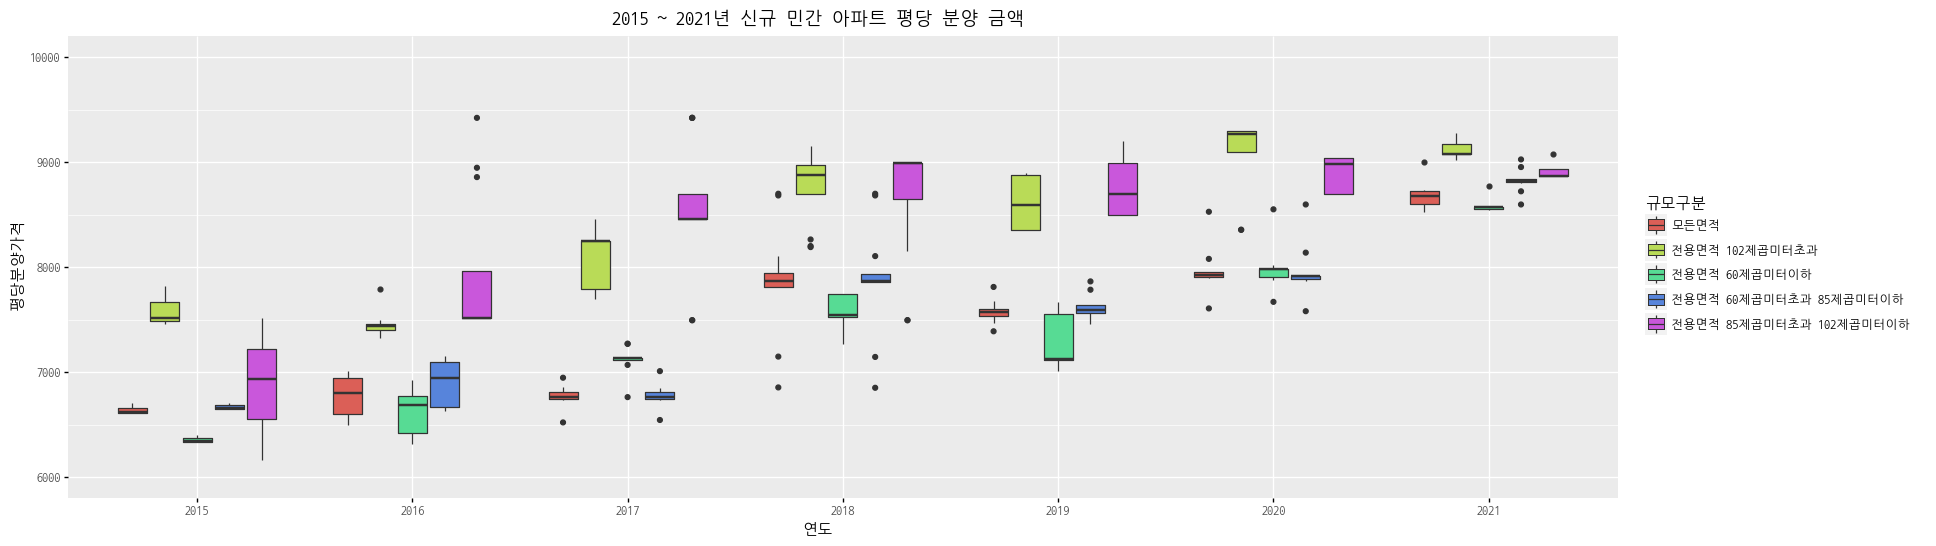

<ggplot: (8773949764279)>

In [53]:
(
ggplot(pre_sale_chungbuk, aes(x='연도', y='평당분양가격', fill='규모구분')) 
    + geom_boxplot() 
    + theme(text=element_text(family='NanumGothicCoding'), figure_size=(20, 6)) 
    + ggtitle('2015 ~ 2021년 신규 민간 아파트 평당 분양 금액')
    + scale_y_continuous(limits=(6000, 10000))
)